<a href="https://colab.research.google.com/github/talibilat/Univeristy-of-Essex/blob/main/CE889/Neural_Network_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

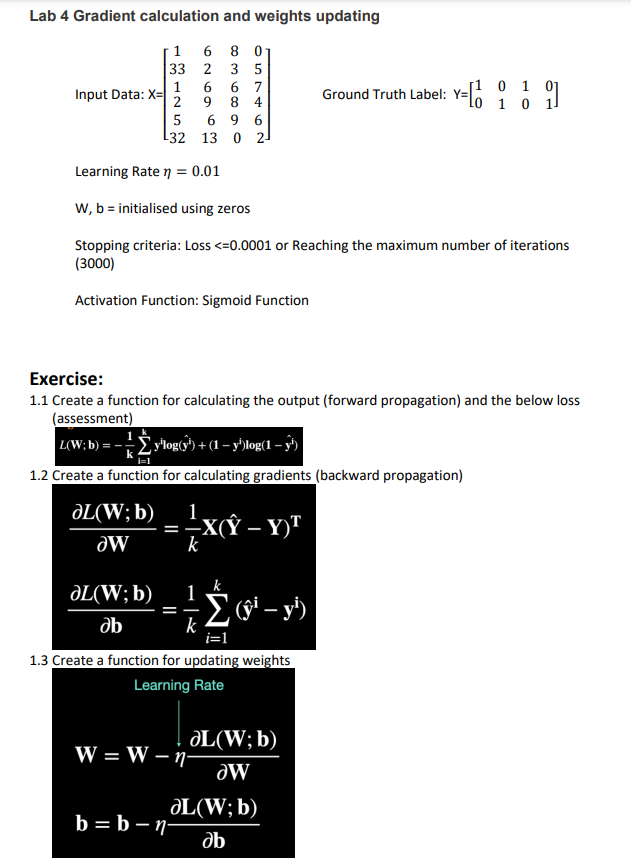

In [183]:
import numpy as np

In [184]:
def sigmoid(z):
  sigmoid = 1/(1+np.exp(-z))
  # print('Sigmoid :', sigmoid)
  return sigmoid 

In [185]:
def forward_propogation(w,x,b):
 z = np.dot(w.T, x) + b
 y_hat = sigmoid(z)
#  print('Y_Hat :', y_hat)
 return y_hat

In [186]:
x = np.array([[1,6,8,0],[33,2,3,5],[1,6,6,7],[2,9,8,4],[5,6,9,6],[32,13,0,2]])
y = np.array([[1,0,1,0],[0,1,0,1]])
print('Input :\n {},\n Output: \n{}'.format(x,y))

Input :
 [[ 1  6  8  0]
 [33  2  3  5]
 [ 1  6  6  7]
 [ 2  9  8  4]
 [ 5  6  9  6]
 [32 13  0  2]],
 Output: 
[[1 0 1 0]
 [0 1 0 1]]


In [187]:
y_hat = forward_propogation(weight,x,bias)

##Backward Propagation lab 4

In [188]:
learning_rate = 0.01
iterations = 3000
loss_limit = 0.0001

In [189]:
weight = np.full((6,2),0)
bias = np.full((2,1),0)
print(weight,bias)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]] [[0]
 [0]]


In [190]:
def gradients(w,b,x,y,y_hat):
  m = x.shape[0]
  w_derivative = (1/m)*(np.dot( x,(y_hat - y).T ))
  # w_derivative = np.mean(x*(y_hat - y).T )
  b_derivative = (1/m)*np.sum(y_hat - y)
  #print('W Derivative {}, B Derivative'.format(w_derivative,b_derivative))
  return w_derivative, b_derivative

In [191]:
def weight_bias_updation(w_derivative,b_derivative,learning_rate,weight,bias):
  weight = weight - (learning_rate * w_derivative)
  bias = bias - (learning_rate * b_derivative)
  #print('New Weight : {}\n, New Bias :{}'.format(weight,bias))
  return weight,bias

In [192]:
def log_loss(y,y_hat):
  loss =  -np.mean((y * np.log(y_hat)) + ((1-y) * np.log(1-y_hat)))
  print('Loss :', str(loss))
  return loss

## Lab 5

In [196]:
def train_model(x,y, loss):
  weights = np.full((6,2),0) 
  bias = np.full((2,1),0)  
  learning_rate = 0.01
  iterations = 3000
  loss_limit = 0.009
  # log_loss = 0.0
  # weights = np.random.randn(6,2) * learning_rate
  # bias = np.random.randn(2,1)*learning_rate  
  
  for i in range(iterations):
    y_hat = forward_propogation(weights,x, bias)
    loss = log_loss(y,y_hat)
    w_derivative, b_derivative = gradients(weights,bias,x,y,y_hat)
    weights,bias = weight_bias_updation(w_derivative, b_derivative, learning_rate, weights, bias)
    print('Weights : {}, Bias : {}, Loss : {}, Iteration : {}'.format(weights[0,0], bias[0,0],loss,i))
    if loss <= loss_limit:
      break
  return weights[0,0], bias[0,0], loss, i

In [197]:
train_model(x,y,0.0)

Loss : 0.6931471805599453
Weights : 0.0025, Bias : 0.0, Loss : 0.6931471805599453, Iteration : 0
Loss : 0.6172796439512007
Weights : 0.0038350263712838084, Bias : 1.850371707708594e-19, Loss : 0.6172796439512007, Iteration : 1
Loss : 0.5972608637236649
Weights : 0.00551806598235781, Bias : 1.850371707708594e-19, Loss : 0.5972608637236649, Iteration : 2
Loss : 0.5806968403431694
Weights : 0.007576714212987775, Bias : -3.7007434154171887e-19, Loss : 0.5806968403431694, Iteration : 3
Loss : 0.5663020133653671
Weights : 0.009964574740073623, Bias : -3.7007434154171887e-19, Loss : 0.5663020133653671, Iteration : 4
Loss : 0.5534787100734204
Weights : 0.012626475795696581, Bias : -3.7007434154171887e-19, Loss : 0.5534787100734204, Iteration : 5
Loss : 0.5418303522572501
Weights : 0.015512002346213185, Bias : -1.8503717077085946e-19, Loss : 0.5418303522572501, Iteration : 6
Loss : 0.5310811940617843
Weights : 0.018578106175143685, Bias : -6.47630097698008e-19, Loss : 0.5310811940617843, Iterat

(1.0322375157808201, 1.0730710301813186e-17, 0.008999946261723686, 2163)